In [5]:
import yfinance as yf
CAPMAN = yf.Ticker("CAPMAN.HE")
import pandas as pd
df = pd.DataFrame([CAPMAN.info])
CAPMAN.info
df["symbol"] = ["CAPMAN.HE"] 
df_small = df[['symbol','currentPrice', 'beta', 'trailingPE','priceToBook','bookValue','trailingEps','quickRatio','currentRatio','returnOnEquity','freeCashflow','revenueGrowth']]
df_small

,symbol,currentPrice,beta,trailingPE,priceToBook,bookValue,trailingEps,quickRatio,currentRatio,returnOnEquity,freeCashflow,revenueGrowth
0,CAPMAN.HE,1.836,0.483,26.22857,1.725564,1.064,0.07,3.531,3.531,0.07969,-2058375,0.475


In [6]:
import numpy as np

In [7]:
CAPMAN.info

{'address1': 'Ludviginkatu 6',
 'address2': '4th Floor',
 'city': 'Helsinki',
 'zip': '00130',
 'country': 'Finland',
 'website': 'https://www.capman.com',
 'industry': 'Asset Management',
 'industryKey': 'asset-management',
 'industryDisp': 'Asset Management',
 'sector': 'Financial Services',
 'sectorKey': 'financial-services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': "CapMan Oyj is a leading Nordic private assets management and investment firm with an active approach to value creation and private equity and venture capital firm specializing in growth capital investments, industry consolidation, special situations, turnaround, recapitalization, middle market buyouts, credit and mezzanine financing in unquoted companies, investments in value-add and income focused real estate, transportation, telecommunications infrastructure and investments in small and mid-cap companies. The firm manages typically closed-end funds that invest in companies and assets based in the N

In [6]:
analyytikko = CAPMAN.analyst_price_targets
analyytikko

{'current': 1.914, 'high': 2.1, 'low': 1.9, 'mean': 2.03333, 'median': 2.1}

In [24]:
df = yf.download("CAPMAN.HE", period="6mo", interval="1d",
                 auto_adjust=True, progress=False)

close = df["Close"]
if isinstance(close, pd.DataFrame):   # varalta jos tulee ticker-taso
    close = close.iloc[:, 0]

r = np.log(close).diff().dropna()

vol_60  = float(r.tail(60).std() * np.sqrt(252))   # <-- tallennettu
vol_252 = float(r.tail(252).std() * np.sqrt(252))  # <-- optional

print("Viimeisten 60 päivän annualisoitu vola:", vol_60)
print("Viimeisten 252 päivän annualisoitu vola:", vol_252)

Viimeisten 60 päivän annualisoitu vola: 0.19446507546045302
Viimeisten 252 päivän annualisoitu vola: 0.1890741732183107


In [13]:
tuloslaskelma = CAPMAN.get_income_stmt()
tuloslaskelma

,2024-12-31,2023-12-31,2022-12-31,2021-12-31
TaxEffectOfUnusualItems,0.000000e+00,0.000000e+00,-3.594357e+05,0.000000e+00
TaxRateForCalcs,2.393000e-01,3.208250e-01,1.382440e-01,1.290390e-01
NormalizedEBITDA,2.075000e+07,4.147000e+06,5.646300e+07,4.605700e+07
TotalUnusualItems,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
TotalUnusualItemsExcludingGoodwill,0.000000e+00,0.000000e+00,-2.600000e+06,0.000000e+00
NetIncomeFromContinuingOperationNetMinorityInterest,4.492000e+06,-3.331000e+06,3.961600e+07,3.432000e+07
ReconciledDepreciation,2.535000e+06,1.491000e+06,4.180000e+06,1.476000e+06
ReconciledCostOfRevenue,2.797900e+07,2.646200e+07,2.815500e+07,2.555300e+07
EBITDA,2.075000e+07,4.147000e+06,5.646300e+07,4.605700e+07
EBIT,1.821500e+07,2.656000e+06,5.228300e+07,4.458100e+07


In [14]:
tase = CAPMAN.balance_sheet
tase

,2024-12-31,2023-12-31,2022-12-31,2021-12-31
Treasury Shares Number,26299.0,26299.0,26299.0,26299.0
Ordinary Shares Number,176851911.0,158823088.0,158028669.0,156590994.0
Share Issued,176878210.0,158849387.0,158054968.0,156617293.0
Net Debt,11465000.0,50796000.0,36131000.0,18188000.0
Total Debt,102533000.0,93856000.0,92966000.0,83008000.0
...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,91932000.0,39292000.0,53636000.0,63207000.0
Other Short Term Investments,3790000.0,275000.0,65000.0,NaN
Cash And Cash Equivalents,88142000.0,39017000.0,53571000.0,63207000.0
Cash Equivalents,11386000.0,872000.0,NaN,NaN


In [15]:
rahavirtalaskelma = CAPMAN.cashflow
rahavirtalaskelma

,2024-12-31,2023-12-31,2022-12-31,2021-12-31
Free Cash Flow,3138000.0,12058000.0,5711000.0,10885000.0
Repayment Of Debt,-50102000.0,0.0,-31520000.0,0.0
Issuance Of Debt,59668000.0,11000.0,39791000.0,140000.0
Issuance Of Capital Stock,NaN,NaN,0.0,90000.0
Capital Expenditure,-47000.0,-26000.0,-333000.0,-140000.0
End Cash Position,90142000.0,41017000.0,55944000.0,65207000.0
Beginning Cash Position,41017000.0,55944000.0,65207000.0,58002000.0
Effect Of Exchange Rate Changes,153000.0,-146000.0,244000.0,NaN
Changes In Cash,48972000.0,-14781000.0,-9507000.0,7205000.0
Financing Cash Flow,-13705000.0,-30317000.0,-17992000.0,-22990000.0


In [29]:
hinta1 = CAPMAN.history(period="8y", interval="1mo")

# 1) Poista tz indeksistä (yleisin syy)
if isinstance(hinta1.index, pd.DatetimeIndex) and hinta1.index.tz is not None:
    hinta1 = hinta1.copy()
    hinta1.index = hinta1.index.tz_localize(None)

hinta1.index.name = "Date"
display(hinta1.tail(24))

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-01,1.748036,1.762147,1.673952,1.707466,1775476,0.06,0.0
2024-04-01,1.761216,1.878570,1.712091,1.860376,1816732,0.00,0.0
2024-05-01,1.860375,1.933153,1.702994,1.737563,2654211,0.00,0.0
2024-06-01,1.748480,1.801244,1.662966,1.692078,1456968,0.00,0.0
2024-07-01,1.684800,1.719369,1.592008,1.701175,1447363,0.00,0.0
2024-08-01,1.701175,1.732105,1.570175,1.677522,1901503,0.00,0.0
2024-09-01,1.677522,1.693897,1.588369,1.664786,1574459,0.04,0.0
2024-10-01,1.712099,1.797704,1.658131,1.676741,2268840,0.00,0.0
2024-11-01,1.684185,1.723265,1.553916,1.648826,2891295,0.00,0.0


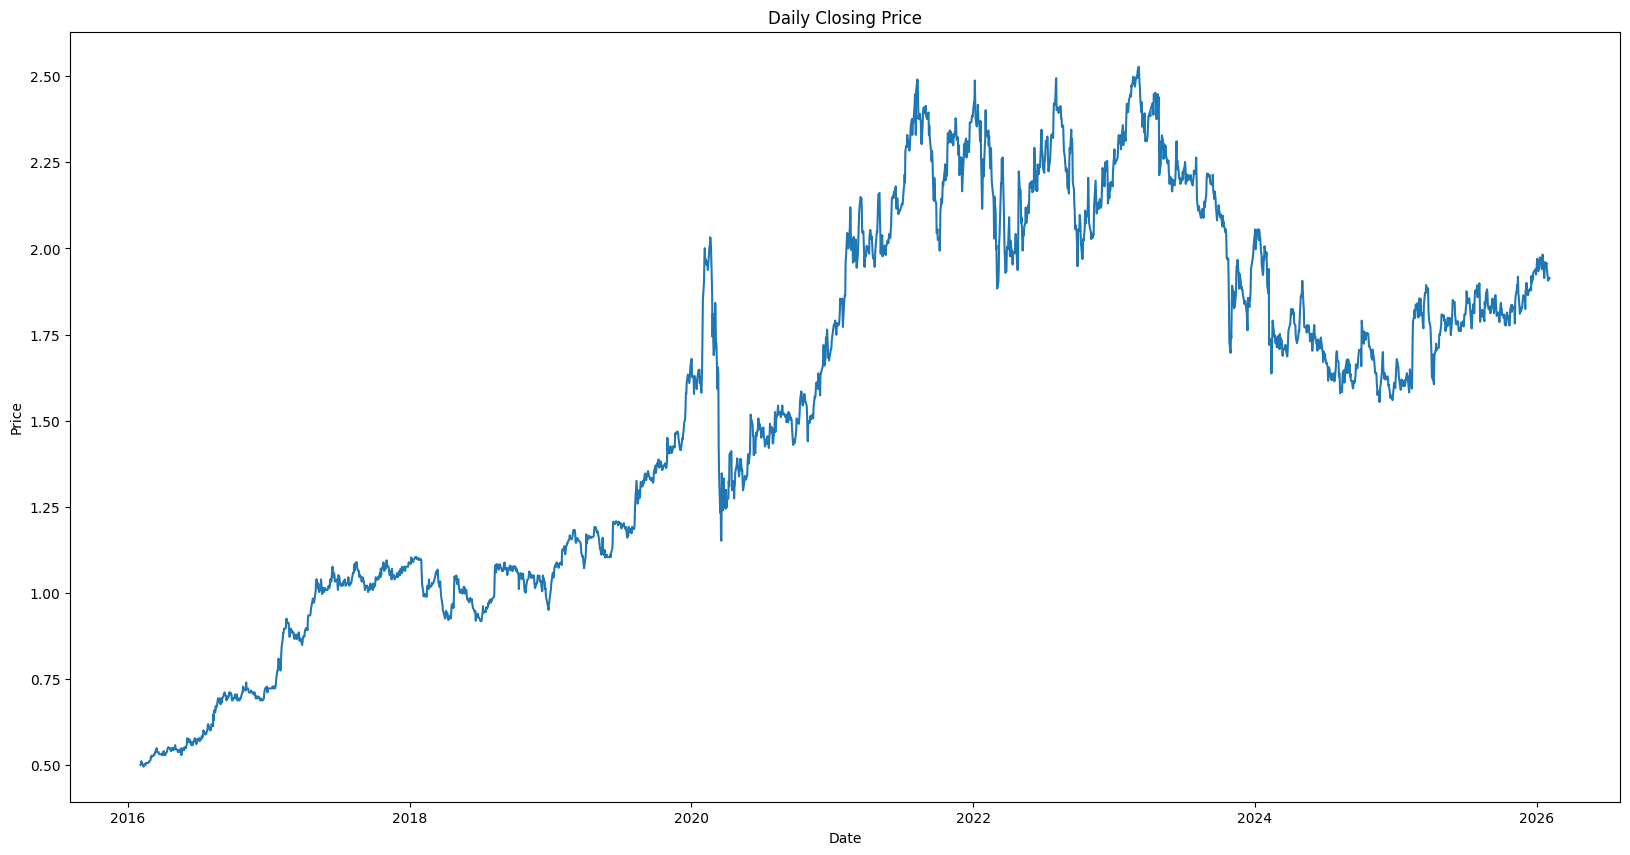

In [19]:
import matplotlib.pyplot as plt
hinta = CAPMAN.history(period="10y", interval = "1d")
plt.figure(figsize=(20, 10))
plt.plot(hinta.index, hinta['Close'])
plt.title('Daily Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.savefig("Hinta.png")

In [22]:
#Viimeisen 2 vuoden ROE
inc = CAPMAN.income_stmt      # annual
bs  = CAPMAN.balance_sheet    # annual

try:
    net_income = inc.loc["Net Income"]
except:
    net_income = inc.loc["Net Income Common Stockholders"]

try:
    equity = bs.loc["Total Stockholder Equity"]
except:
    equity = bs.loc["Stockholders Equity"]

cols = list(set(inc.columns).intersection(set(bs.columns)))
cols.sort(reverse=True)

y0, y1, y2 = cols[0], cols[1], cols[2]

avg_equity_y0 = (equity[y0] + equity[y1]) / 2
avg_equity_y1 = (equity[y1] + equity[y2]) / 2

roe_y0 = net_income[y0] / avg_equity_y0
roe_y1 = net_income[y1] / avg_equity_y1
roe_2y_avg = (roe_y0 + roe_y1) / 2  # <-- lisää tämä

print("Fiscal year end:", y0, "ROE:", roe_y0)
print("Fiscal year end:", y1, "ROE:", roe_y1)
print("2y average ROE:", roe_2y_avg)

print("ROE %:", roe_y0 * 100, roe_y1 * 100)
print("2y avg %:", roe_2y_avg * 100)

Fiscal year end: 2024-12-31 00:00:00 ROE: 0.4395846020705792
Fiscal year end: 2023-12-31 00:00:00 ROE: 0.010629686519014582
2y average ROE: 0.2251071442947969
ROE %: 43.95846020705792 1.0629686519014583
2y avg %: 22.510714429479687


In [30]:
metrics = pd.DataFrame({
    "Metric": [
        "ROE (latest FY)",
        "ROE (prev FY)",
        "ROE 2y average",
        "Volatility 60d (ann.)",
        "Volatility 252d (ann.)"
    ],
    "Value": [
        float(roe_y0),
        float(roe_y1),
        float(roe_2y_avg),
        float(vol_60),
        float(vol_252)
    ],
})

# prosenttina helpompi luettava
metrics["Value_%"] = metrics["Value"] * 100

with pd.ExcelWriter("CAPMAN.xlsx", engine="openpyxl") as writer:
    # 1) Yhteenveto ylös
    df_small.to_excel(writer, sheet_name="Yhteenveto", index=False)

    # 2) metrics alle (2 tyhjää riviä väliin)
    startrow = len(df_small) + 3
    metrics.to_excel(writer, sheet_name="Yhteenveto", index=False, startrow=startrow)

    # muut sheetit normaalisti
    tuloslaskelma.to_excel(writer, sheet_name="Tuloslaskelma")
    tase.to_excel(writer, sheet_name="Tase")
    rahavirtalaskelma.to_excel(writer, sheet_name="Rahavirtalaskelma")
    hinta1.to_excel(writer, sheet_name="Hinta")

In [2]:
cap = yf.download("CAPMAN.HE", period="5y", interval="1mo", auto_adjust=True, progress=False)["Close"]

# Kokeile useampi Helsingin indeksi/ETF, koska kaikilla ei ole dataa Yahoo:ssa
candidates = ["^OMXHPI", "^OMXH25", "OMXHPI.HE", "OMXH25.HE", "HEL.HE"]
mkt = None
used = None
for t in candidates:
    s = yf.download(t, period="5y", interval="1mo", auto_adjust=True, progress=False)
    if not s.empty and "Close" in s.columns and s["Close"].dropna().shape[0] > 10:
        mkt = s["Close"]
        used = t
        break

print("CAPMAN rows:", cap.dropna().shape[0])
print("Market ticker used:", used)
print("Market rows:", None if mkt is None else mkt.dropna().shape[0])

# 2) Yhdistä ja varmista ettei tule tyhjää
df = pd.concat([cap, mkt], axis=1)
df.columns = ["capman", "mkt"]
df = df.dropna()
print("Common rows after dropna:", df.shape[0])

# 3) Laske tuotot ja beta
r = np.log(df).diff().dropna()
print("Return rows:", r.shape[0])

if r.shape[0] < 12:
    raise ValueError("Liian vähän datapisteitä betan laskuun. Markkinaticker ei toimi tai data ei kohtaa.")

beta = np.cov(r["capman"], r["mkt"], ddof=1)[0,1] / np.var(r["mkt"], ddof=1)
print("Beta:", beta)

CAPMAN rows: 60
Market ticker used: ^OMXH25
Market rows: 60
Common rows after dropna: 60
Return rows: 59
Beta: 0.9717475638622501
